<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_2_0901_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 핸즈온 4장 모델 훈련 p. 157-184

- 선형회귀를 훈련시키는 두가지 방법
1. 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터(즉, 훈련 세트에 대해 비 용 함수를 최소화하는 모델 파라미터)를 해석적으로 구합니다
2. 경사하강법(GD)이라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킵니다. 결국에는 앞의 방법과 동일한 파라미터로 수렴합니다. 경사 하강법의 변종으로 2부에서 신경망을 공부할 때 계속 사용하게 될 배치batch 경사 하강법, 미니배치mini-batch 경사하강법, 확률적stochastic 경사 하강법 (SGD)도 살펴보겠습니다.
- 비선형 데이터셋에 훈련시킬 수 있는 조금 더 복잡한 모델인 다항 회귀: 훈련데이터에 과대적합되기 쉬움.
- 로지스틱 회귀와 소프트맥스 회귀

## 선형회귀
- 입력 특성의 가중치 합과 편향bias이라는 상수를 더해 예측을 만듭니다
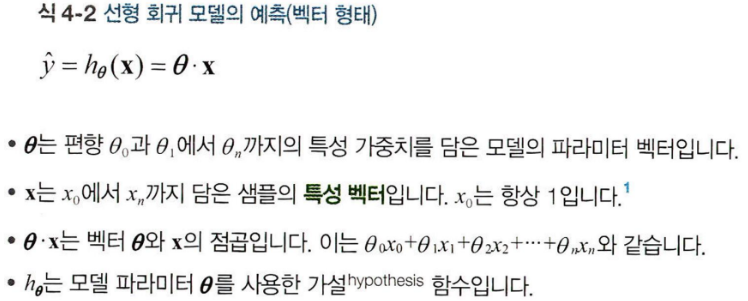

- 선형 회귀 모델 을 훈련시키려면 RMSE를 최소화하는 2를 찾아야 합니다

## 정규방정식
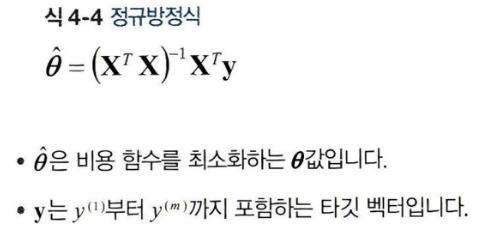

In [1]:
# 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

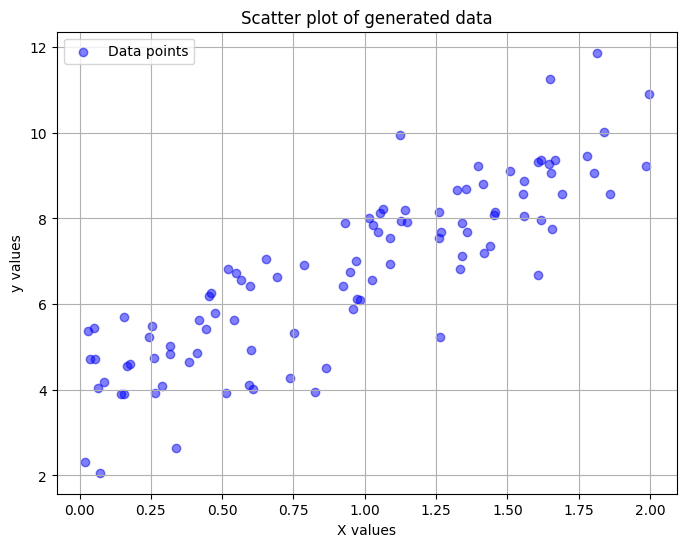

In [2]:
# scatter plot 생성
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label="Data points")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Scatter plot of generated data")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# 정규방정식으로 θ^ 계산

X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

이 데이터를 생성하기 위해 생성한 함수: y = 4 + 3x1 + 가우시안잡음

In [4]:
# 정규방정식으로 계산한 값 확인

theta_best

array([[3.86015802],
       [3.08642858]])

기대한 파라미터와 매우 비슷하지만 잡음 때문에 정확하진 X

In [5]:
# θ^을 사용해 예측

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86015802],
       [10.03301518]])

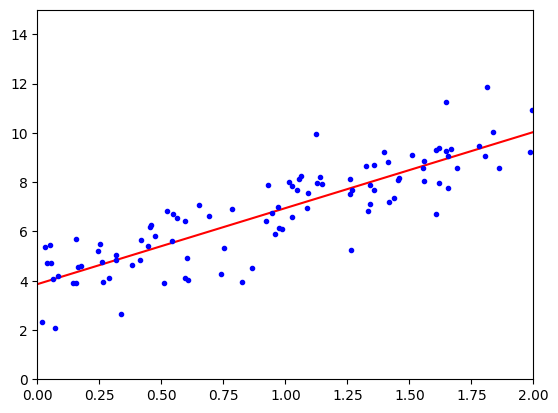

In [6]:
# 그래프로 나타내기

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

## 사이킷런에서 선형회귀 수행

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([3.86015802]), array([[3.08642858]]))

In [9]:
lin_reg.predict(X_new)

array([[ 3.86015802],
       [10.03301518]])

scipy.linalg.lstsq() 함수:
LinearRegression 클래스의 기반이 됨
바로 호출할 수 있음

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86015802],
       [3.08642858]])

- 이 함수는 θ^ = X+ * y 을 계산함
- 여기서 X+ 는 X의 유사역행렬(정확히는 무어-펜로즈 역행렬)

In [11]:
# np.linalg.pinv() 함수 -> 유사역행렬을 직접 구할 수 있음
np.linalg.pinv(X_b).dot(y)

array([[3.86015802],
       [3.08642858]])

- 유사역행렬 -> 특잇값분해(SVD)로 계산
- 시그마+ 계산하기
1. 알고리즘이 시그마를 먼저 구함
2, 어떤 낮은 임곗값보다 작은 모든 수를 0으로 바꿈
3. 0이 아닌 모든 값을 역수로 치환
4. 만들어진 행렬 전치


## 4.1.2 계산 복잡도
정규방정식에서 역행렬을 계산하는 계산 복잡도는 일반적으로 O(n^2.4)에서 O(n^3)사이이다. 다시 말해 특성 수가 두 배로 늘어나면 계산 시간이 대략 5. 에서 8배로 증가한다.

또한 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 특성이 매우 많고 훈련 샘플이 너무 많을 때에 적합한 방법은 따로 있다.

## 4.2 경사 하강법
파라미터 벡터에 대해 비용함수의 현재 그레이디언트를 계산하고 감소하는 방향을 진행하다 0이되면 최솟값에 도달한 것

theta를 임의의값으로 시작해(무작위 초기화) 한번에 조금씩 비용함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할때까지 점진적으로 향상시킴

가장 중요한 파라미터는 스텝의 크기로, 학습률 파라미터로 결정됨. 학습률이 너무 작으면 알고리즘이 수렴하기 윟 반복을 많이 진행해야 하므로 시간이 오래걸림. 학습률이 너무 크면 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 높은 곳으로 올라가게 됨.

무작위 초기화때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴함.

선형회귀는 볼록함수이므로 지역 최솟값이 없고 하나의 전역 최소값만 있다는 뜻이므로 경사하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장함.

비용함수를 최소화하는 모델 파라미터의 조합을 찾는 일임. 이를 모델의 파라미터 공간에서 찾는다고 함.

## 4.2.1 배치 경사 하강법

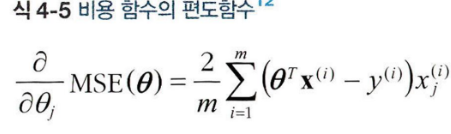

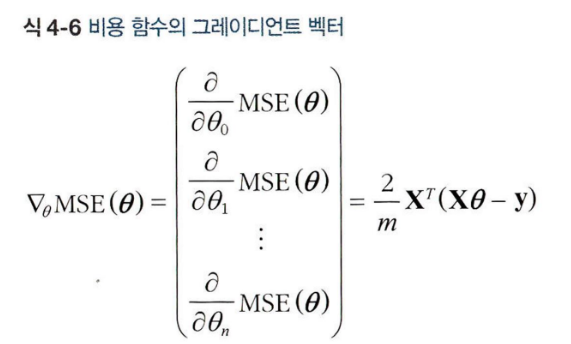

위로 향하는 그레이디언트 벡터가 구해지면 반대방향인 아래로 가야함

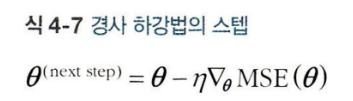

In [12]:
# 알고리즘 구현

eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[3.86015802],
       [3.08642858]])

-> 정규방정식으로 찾은 것과 정확히 같음. 경사하강법 완벽하게 작동

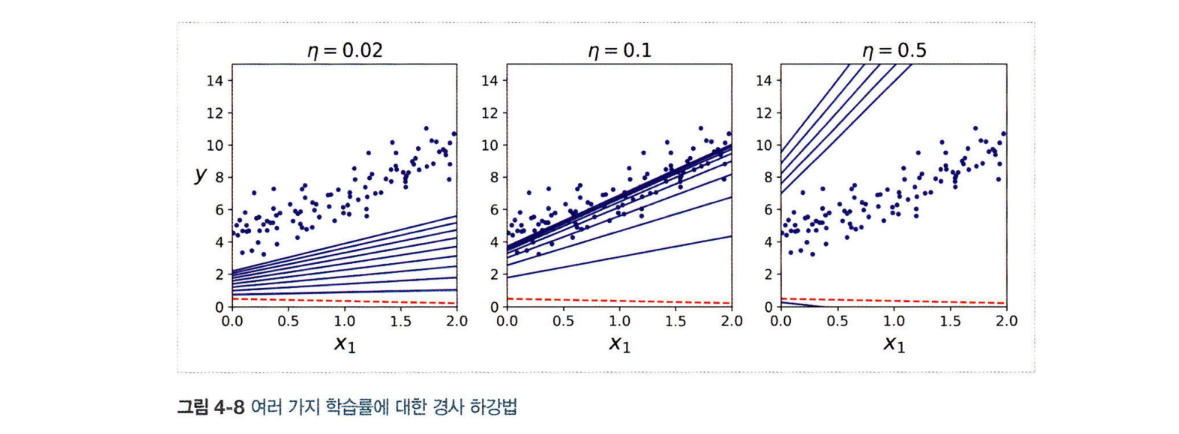

-> 가운데가 학습률 적당함.
- 적절한 학습률을 찾으려면 그리드 탐색을 사용하지만 반복 횟수를 제한해야함

## 4.2.2 확률적 경사하강법

매스텝에서 한개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산 -> 데이터가 적어서 알고리즘이 빠름 -> 매우 큰 훈련세트도 훈련 가능

하지만 불안정함. 비용함수가 최솟값에 다다를 때까지 위아래로 요동치면서 평균적으로 감소함.

배치경사하강법보다 전역 최솟값을 찾을 가능성이 높음

학습률을 점진적으로 감소시켜야함. 학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있음. 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해서 지역 최솟값에 머무를 수 있음

In [14]:
# 확률적 경사 하강법 구현

n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i )
        theta = theta - eta * gradients

In [15]:
theta

array([[3.85722286],
       [3.11406467]])

In [16]:
# 사이킷런에서 SGD 방식으로 선형 회귀 사용

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.84508281]), array([3.07852077]))

-> 정규 방정식으로 구한 것과 매우 비슷한 값

## 4.2.3 미니배치 경사 하강법

- 미니배치 경사 하강법: 미니배치라 부르는 임의의 작은 샘플 세트에 대해 그레디언트 계산
- 장점: GPU를 사용해서 얻는 성능 향상

- 배치 경사 하강법: 실제 최솟값에서 멈춤
- 확률적, 미니배치: 그처에서 맴돎

but
배치 경사: 오래걸림(-) & 확률적,미니배치: 적절한 학습 스케줄 사용시 도달 가능(+)

## 4.3 다항 회귀

- 비선형 데이터를 학습하는 데 선형 모델을 사용할 수 있음.
- 다항 회귀: 각 특성의 거듭제곱을 새로운 특성으로 추가, 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시킴

In [18]:
# 2차방정식으로 비선형 데이터 생성

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [20]:
# 사이킷런의 PolynomialFeatures 를 사용해 훈련 데이터 변환

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.57595025])

In [21]:
X_poly[0]

array([0.57595025, 0.33171869])

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97562372]), array([[0.9432458 , 0.48839858]]))

In [ ]:
특성이 여러개일 때 다항 회귀는 이 특성 사이의 관계를 찾을 수 있음

## 4.4 학습 곡선

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
      model.fit(X_train[:m], y_train[:m])
      y_train_predict = model.predict(X_train[:m])
      y_val_predict = model.predict(X_val)
      train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
      val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

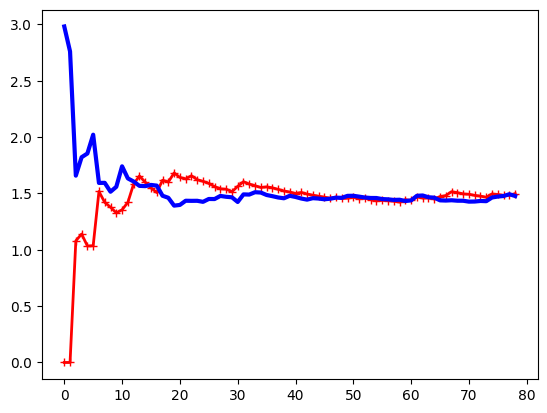

In [24]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

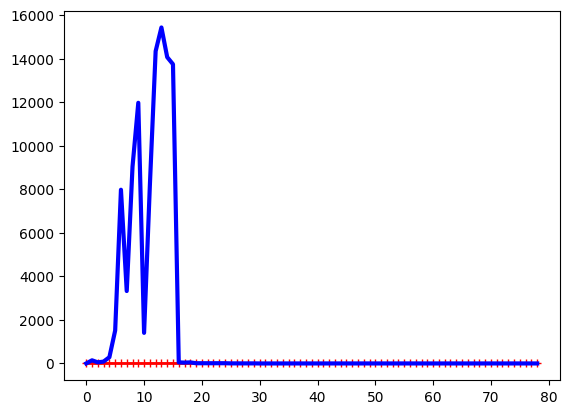

In [25]:
# 10차 다항 회귀 모델의 학습 곡선을 그려보기
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)